In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('LLM09joined_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_x                      5098 non-null   float64
 1   submitter                 5098 non-null   object 
 2   authors_x                 5098 non-null   object 
 3   title                     5098 non-null   object 
 4   comments                  2732 non-null   object 
 5   journal-ref               143 non-null    object 
 6   doi                       176 non-null    object 
 7   report-no                 8 non-null      object 
 8   categories                5098 non-null   object 
 9   license                   5098 non-null   object 
 10  abstract                  5098 non-null   object 
 11  versions                  5098 non-null   object 
 12  update_date               5098 non-null   object 
 13  authors_parsed            5098 non-null   object 
 14  ContainC

In [4]:
df

,id_x,submitter,authors_x,title,comments,journal-ref,doi,report-no,categories,license,...,url,venue,year,referenceCount,citationCount,influentialCitationCount,isOpenAccess,fieldsOfStudy,s2FieldsOfStudy,authors_y
0,1902.09097,Joe Booth,"Joe Booth, Jackson Booth",Marathon Environments: Multi-Agent Continuous ...,AAAI-2019 Workshop on Games and Simulations fo...,AAAI-2019 Workshop on Games and Simulations fo...,NaN,NaN,cs.AI cs.LG cs.MA,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/52b6d349...,arXiv.org,2019.0,12.0,5.0,0.0,False,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '37373648', 'name': 'J. Booth'},..."
1,1903.01669,Vijaya Sai Krishna Gottipati,"Sai Krishna, Keehong Seo, Dhaivat Bhatt, Vince...",Deep Active Localization,10 pages,NaN,NaN,NaN,cs.RO cs.AI cs.LG stat.ML,http://creativecommons.org/publicdomain/zero/1.0/,...,https://www.semanticscholar.org/paper/cbe54f8e...,IEEE Robotics and Automation Letters,2019.0,37.0,29.0,0.0,True,"['Engineering', 'Computer Science', 'Mathemati...","[{'category': 'Engineering', 'source': 'extern...","[{'authorId': '1381860090', 'name': 'Sai Krish..."
2,1903.08855,Nelson F. Liu,Nelson F. Liu and Matt Gardner and Yonatan Bel...,Linguistic Knowledge and Transferability of Co...,"22 pages, 4 figures; to appear at NAACL 2019",NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/f6fbb680...,North American Chapter of the Association for ...,2019.0,83.0,606.0,157.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '22243769', 'name': 'Nelson F. L..."
3,1903.09295,'Stephen' Zhen Gou,"Stephen Zhen Gou, Yuyang Liu",DQN with model-based exploration: efficient le...,NaN,NaN,NaN,NaN,cs.LG stat.ML,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/5d05577d...,arXiv.org,2019.0,11.0,7.0,2.0,False,"['Computer Science', 'Mathematics']","[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '117387024', 'name': 'Stephen Go..."
4,1903.11437,Franck Burlot,Franck Burlot and Fran\c{c}ois Yvon,Using Monolingual Data in Neural Machine Trans...,Published in the Proceedings of the Third Conf...,NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/e6deb7f4...,Conference on Machine Translation,2018.0,40.0,85.0,8.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '3456893', 'name': 'Franck Burlo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5093,2310.01432,Zongjie Li,"Zongjie Li, Chaozheng Wang, Pingchuan Ma, Daoy...",Split and Merge: Aligning Position Biases in L...,NaN,NaN,NaN,NaN,cs.CL cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/2e0f66e6...,arXiv.org,2023.0,41.0,0.0,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '2118207559', 'name': 'Zongjie L..."
5094,2310.01434,Tom\'as Marques,"Samuel Carreira, Tom\'as Marques, Jos\'e Ribei...",Revolutionizing Mobile Interaction: Enabling a...,NaN,NaN,NaN,NaN,cs.CL cs.AI cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/e2204895...,arXiv.org,2023.0,13.0,0.0,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '2253468900', 'name': 'Samuel Ca..."
5095,2310.01436,Yang Gao,"Haishuai Wang, Yang Gao, Xin Zheng, Peng Zhang...",Graph Neural Architecture Search with GPT-4,NaN,NaN,NaN,NaN,cs.LG cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,...,https://www.semanticscholar.org/paper/0b8265a6...,arXiv.org,2023.0,29.0,0.0,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '2238917689', 'name': 'Haishuai ..."
5096,2310.01441,Hejia Geng,"Hejia Geng, Boxun Xu, Peng Li",

# categories and field

## number of category

In [5]:
# Step 1: Split 'categories' into separate rows
df_categories = df['categories'].str.split(' ', expand=True).stack().reset_index(level=1, drop=True).rename('category')

# Step 2: Count the number of occurrences for each category
category_counts = df_categories.value_counts()

# Convert to DataFrame for better visualization
df_category_counts = category_counts.reset_index()
df_category_counts.columns = ['Category', 'Count']
print(df_category_counts[0:50])

             Category  Count
0               cs.CL   3556
1               cs.AI   2268
2               cs.LG   1646
3               cs.CV    454
4               cs.HC    302
5               cs.CY    293
6               cs.SE    278
7               cs.IR    233
8               cs.CR    160
9               cs.RO    153
10            stat.ML     99
11            eess.AS     89
12              cs.SD     78
13              cs.PL     61
14              cs.DB     51
15              cs.NE     47
16              cs.DC     47
17              cs.MM     40
18              cs.SI     39
19              cs.MA     23
20           q-fin.EC     22
21            econ.GN     22
22              cs.DL     20
23              cs.LO     20
24              cs.NI     17
25            eess.SP     16
26            eess.IV     15
27              cs.SY     15
28              cs.AR     15
29            eess.SY     15
30           q-bio.NC     14
31              cs.CE     14
32           q-bio.QM     14
33      physic

# Average Time Interval (Innovation Speed)

In [6]:
df['versions']

0       [{'version': 'v1', 'created': 'Mon, 25 Feb 201...
1       [{'version': 'v1', 'created': 'Tue, 5 Mar 2019...
2       [{'version': 'v1', 'created': 'Thu, 21 Mar 201...
3       [{'version': 'v1', 'created': 'Fri, 22 Mar 201...
4       [{'version': 'v1', 'created': 'Wed, 27 Mar 201...
                              ...                        
5093    [{'version': 'v1', 'created': 'Fri, 29 Sep 202...
5094    [{'version': 'v1', 'created': 'Fri, 29 Sep 202...
5095    [{'version': 'v1', 'created': 'Sat, 30 Sep 202...
5096    [{'version': 'v1', 'created': 'Sat, 30 Sep 202...
5097    [{'version': 'v1', 'created': 'Fri, 29 Sep 202...
Name: versions, Length: 5098, dtype: object

In [7]:
import pandas as pd
import datetime
import ast

# the original 'versions' column is a string representation of a list of dictionaries, so we need to convert it to a list of dictionaries by using ast.literal_eval
df['versions'] = df['versions'].apply(ast.literal_eval)

def convert_time(lst):
    for d in lst:
        dt = datetime.datetime.strptime(d['created'], '%a, %d %b %Y %H:%M:%S %Z')
        dt = dt.replace(second=0, microsecond=0)
        d['created'] = dt
    return lst

df['versions'] = df['versions'].apply(convert_time)

In [8]:
def get_first_submit_time(lst):
    times = [d['created'] for d in lst]
    return min(times).replace(second=0, microsecond=0)

df['firstSubmitTime'] = df['versions'].apply(get_first_submit_time)

In [9]:
df['firstSubmitTime']

0      2019-02-25 05:56:00
1      2019-03-05 05:00:00
2      2019-03-21 07:19:00
3      2019-03-22 01:41:00
4      2019-03-27 14:11:00
               ...        
5093   2023-09-29 14:38:00
5094   2023-09-29 16:30:00
5095   2023-09-30 08:05:00
5096   2023-09-30 20:18:00
5097   2023-09-29 22:55:00
Name: firstSubmitTime, Length: 5098, dtype: datetime64[ns]

In [10]:
df = df.sort_values('firstSubmitTime')
df['TimeInterval'] = df['firstSubmitTime'].diff().dt.total_seconds() / 3600  # convert to hours
df['Month'] = df['firstSubmitTime'].dt.to_period('M')
ati = df.groupby('Month')['TimeInterval'].mean()

In [11]:
IS = 1/ati

In [12]:
IS

Month
2019-02         NaN
2019-03    0.005493
2019-04    0.006129
2019-05    0.004786
2019-06    0.008874
2019-07    0.006862
2019-08    0.010200
2019-09    0.008719
2019-10    0.010066
2019-11    0.014496
2019-12    0.016976
2020-01    0.005039
2020-02    0.007134
2020-03    0.005961
2020-04    0.024184
2020-05    0.012940
2020-06    0.014437
2020-07    0.010152
2020-08    0.018936
2020-09    0.033541
2020-10    0.041164
2020-11    0.019550
2020-12    0.030887
2021-01    0.019071
2021-02    0.042814
2021-03    0.009750
2021-04    0.047224
2021-05    0.024476
2021-06    0.049010
2021-07    0.024069
2021-08    0.031899
2021-09    0.085626
2021-10    0.054402
2021-11    0.047442
2021-12    0.043903
2022-01    0.045823
2022-02    0.049513
2022-03    0.071022
2022-04    0.069043
2022-05    0.118742
2022-06    0.082799
2022-07    0.061496
2022-08    0.058256
2022-09    0.081101
2022-10    0.185494
2022-11    0.109305
2022-12    0.194638
2023-01    0.127995
2023-02    0.272315
2023-03    0.4

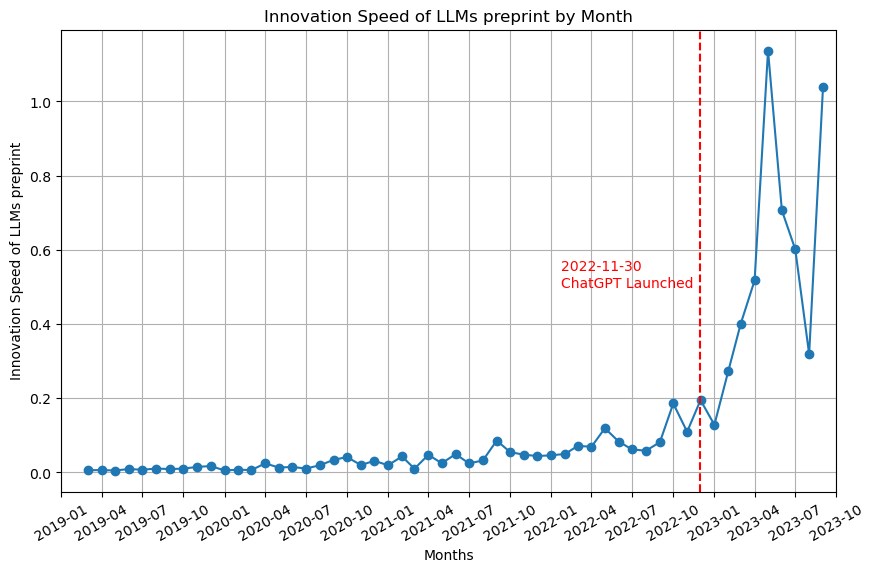

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(IS.index.to_timestamp(), IS.values, marker='o')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-ticks every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format x-ticks as 'YYYY-MM'
ax.set_xlim([pd.Timestamp('2019-01'), pd.Timestamp('2023-10')])  # set x-axis limits
plt.xticks(rotation=30)
plt.xlabel('Months')
plt.ylabel('Innovation Speed of LLMs preprint')
plt.title('Innovation Speed of LLMs preprint by Month')
plt.grid(True)
ax.axvline(pd.Timestamp('2022-11-30'), color='r', linestyle='--')  # add vertical line
ax.annotate('2022-11-30\nChatGPT Launched', xy=(pd.Timestamp('2022-11-30'), 0.5), xycoords='data', xytext=(-100,0), textcoords='offset points', color='r')  # add annotation
plt.show()

## number of category by month

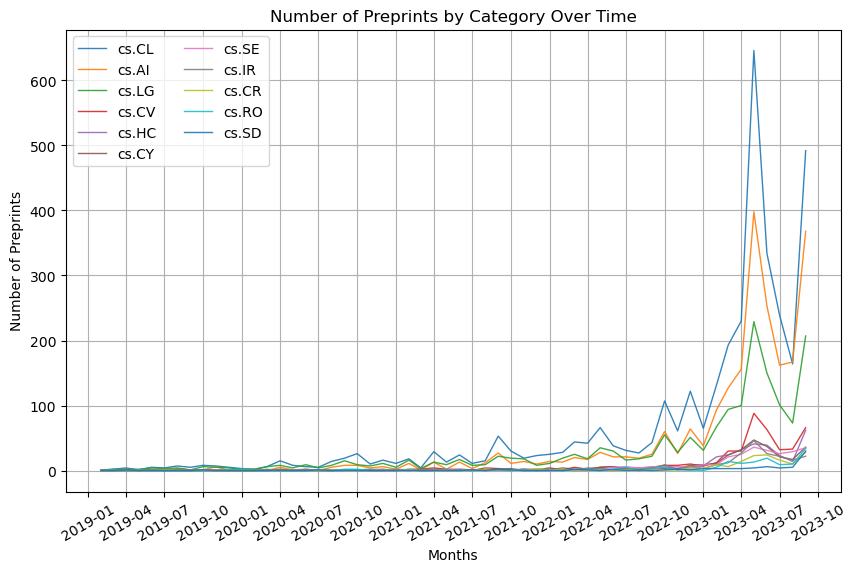

In [14]:
# Step 1: Merge df_filtered with original DataFrame to get 'firstSubmitTime'
df_merged = df.join(df_categories, how='inner')

# Step 2: Create new DataFrame with counts of preprints for each category by month
df_counts = df_merged.groupby([df_merged['firstSubmitTime'].dt.to_period('M'), 'category']).size().unstack(fill_value=0)

# Step 3: Plot counts for each category over time
plt.figure(figsize=(10, 6))

# Define the order of the legend
categories = ['cs.CL', 'cs.AI', 'cs.LG', 'cs.CV', 'cs.HC', 'cs.CY', 'cs.SE', 'cs.IR', 'cs.CR', 'cs.RO', 'cs.SD']

# Plot each category in the specified order
for category in categories:
    plt.plot(df_counts.index.to_timestamp(), df_counts[category], marker='', linewidth=1, alpha=0.9, label=category)

# Set x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-ticks every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format x-ticks as 'YYYY-MM'
plt.xticks(rotation=30)  # rotate x-axis ticks

plt.xlabel('Months')
plt.ylabel('Number of Preprints')
plt.title('Number of Preprints by Category Over Time')
plt.legend(loc='upper left', ncol=2)
plt.grid(True)
plt.show()

## IS of category by month

In [15]:
df_merged = df_merged.sort_values('firstSubmitTime')

In [16]:
# Define a function to calculate the time difference
def calculate_diff(group):
    return group.diff().dt.total_seconds() / 3600  # convert to hours

# Apply the function to each ['Month', 'category'] group
df_merged = df_merged.reset_index()
df_merged['MonthGroupTimeInterval'] = df_merged.groupby(['Month', 'category'])['firstSubmitTime'].apply(calculate_diff)
df_merged.set_index('index', inplace=True)

In [17]:
# df_merged.loc[category == 'cs.CY', month == '2023-09']
df_merged.loc[(df_merged['category'] == 'cs.CY') & (df_merged['Month'] == '2022-03')]

,id_x,submitter,authors_x,title,comments,journal-ref,doi,report-no,categories,license,...,influentialCitationCount,isOpenAccess,fieldsOfStudy,s2FieldsOfStudy,authors_y,firstSubmitTime,TimeInterval,Month,category,MonthGroupTimeInterval
index,,,,,,,,,,,,,,,,,,,,,
664,2203.07504,Robert Wolfe,"Robert Wolfe, Aylin Caliskan",VAST: The Valence-Assessing Semantics Test for...,To be published in AAAI 2022,NaN,NaN,NaN,cs.CL cs.AI cs.CY cs.LG,http://creativecommons.org/licenses/by-nc-sa/4.0/,...,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '100508901', 'name': 'R. Wolfe'}...",2022-03-14 21:29:00,4.583333,2022-03,cs.CY,NaN
665,2203.07511,Robert Wolfe,"Robert Wolfe, Aylin Caliskan",Contrastive Visual Semantic Pretraining Magnif...,To be published in ACL 2022,NaN,NaN,NaN,cs.CL cs.AI cs.CY cs.LG,http://creativecommons.org/licenses/by-nc-sa/4.0/,...,1.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '100508901', 'name': 'R. Wolfe'}...",2022-03-14 21:42:00,0.216667,2022-03,cs.CY,0.216667


In [18]:
df_merged.groupby(['category','Month'])['MonthGroupTimeInterval'].mean()['cs.CY']

Month
2019-08           NaN
2019-11           NaN
2020-04    285.650000
2020-09           NaN
2021-02           NaN
2021-04           NaN
2021-05           NaN
2021-06    233.400000
2021-07           NaN
2021-08           NaN
2021-09    168.200000
2021-10    212.000000
2021-12           NaN
2022-01           NaN
2022-02    157.044444
2022-03      0.216667
2022-04    156.616667
2022-05    118.820833
2022-06     88.806667
2022-07    429.216667
2022-09    121.395833
2022-10    198.200000
2022-11    189.175000
2022-12     55.407143
2023-01     73.295833
2023-02     57.625000
2023-03     24.153623
2023-04     20.510753
2023-05     15.878986
2023-06     19.820833
2023-07     29.730000
2023-08     30.775000
2023-09     19.072857
Freq: M, Name: MonthGroupTimeInterval, dtype: float64

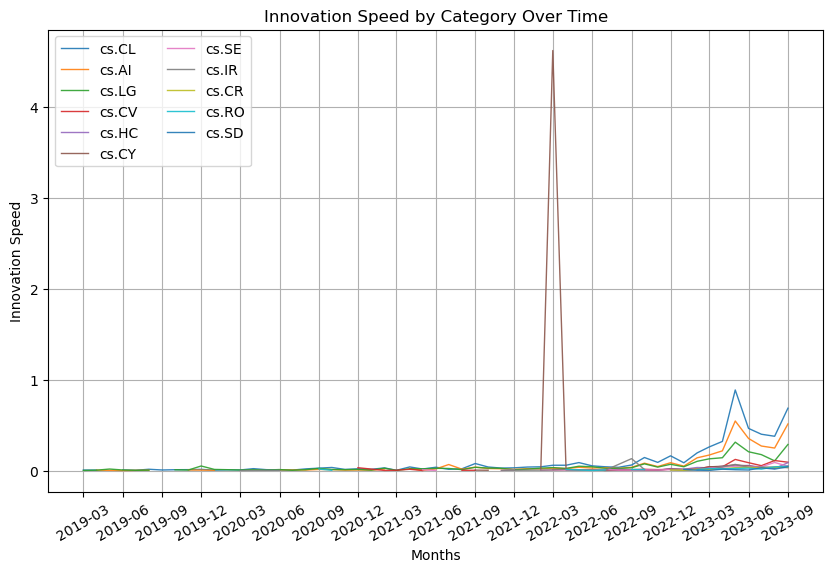

In [19]:
df_IS = 1/(df_merged.groupby(['category','Month'])['MonthGroupTimeInterval'].mean())
# Step 3: Plot IS for each category over time
plt.figure(figsize=(10, 6))

# Define the order of the legend
categories = ['cs.CL', 'cs.AI', 'cs.LG', 'cs.CV', 'cs.HC', 'cs.CY', 'cs.SE', 'cs.IR', 'cs.CR', 'cs.RO', 'cs.SD']

# Plot each category in the specified order
for category in categories:
    dates = pd.to_datetime(df_IS[category].index.to_timestamp().strftime('%Y-%m'))
    plt.plot(dates, df_IS[category], marker='', linewidth=1, alpha=0.9, label=category)

# Set x-axis ticks and labels
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-ticks every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format x-ticks as 'YYYY-MM'
plt.xticks(rotation=30)  # rotate x-axis ticks

plt.xlabel('Months')
plt.ylabel('Innovation Speed')
plt.title('Innovation Speed by Category Over Time')
plt.legend(loc='upper left', ncol=2)
plt.grid(True)
plt.show()

# AI players

In [20]:
import ast
# the original 'authors_y' column is a string representation of a list of dictionaries, so we need to convert it to a list of dictionaries by using ast.literal_eval
df['authors_y'] = df['authors_y'].apply(ast.literal_eval)
# Create new columns based on conditions
df['containOpenAndClose'] = ((df['OpenModelNumber'] > 0) & (df['CloseModelNumber'] > 0)).astype(int)
df['PureClose'] = ((df['OpenModelNumber'] == 0) & (df['CloseModelNumber'] > 0)).astype(int)
df['PureOpen'] = ((df['OpenModelNumber'] > 0) & (df['CloseModelNumber'] == 0)).astype(int)
# Add new columns based on conditions
df['containOpen'] = (df['OpenModelNumber'] > 0).astype(int)
df['containClose'] = (df['CloseModelNumber'] > 0).astype(int)
df['containModel'] = (df['modelNumber'] > 0).astype(int)

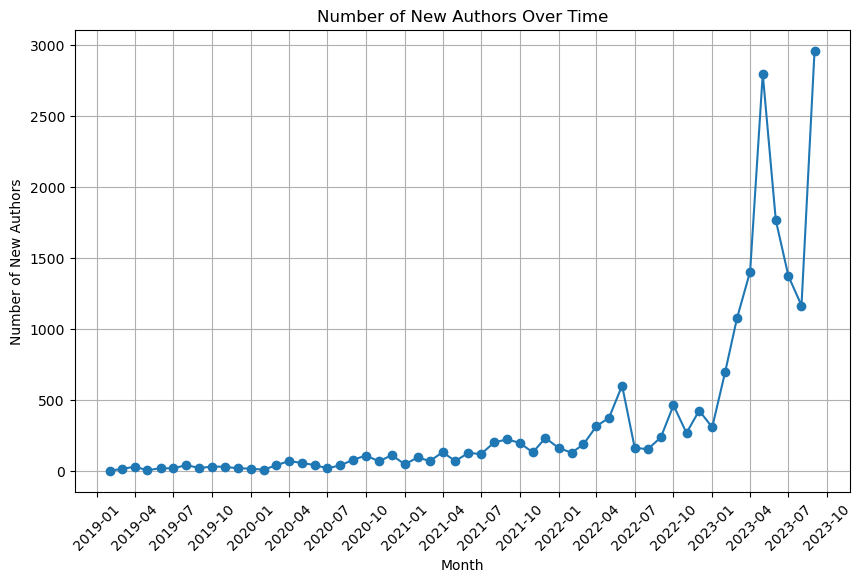

In [21]:
import matplotlib.pyplot as plt

# Initialize an empty set to store unique authors
unique_authors = set()

# Initialize an empty dictionary to store the count of new authors for each month
new_authors_count = {}

# Sort the DataFrame by 'Month'
df = df.sort_values('Month')

# For each row in the DataFrame
for index, row in df.iterrows():
    # Extract the authors
    authors = row['authors_y']
    # For each author
    for author in authors:
        # If the author is not in the set of unique authors
        if author['authorId'] not in unique_authors:
            # Increment the count for the current month
            new_authors_count[row['Month']] = new_authors_count.get(row['Month'], 0) + 1
            # Add the author to the set of unique authors
            unique_authors.add(author['authorId'])

# Convert the dictionary to a DataFrame for plotting
df_new_authors = pd.DataFrame(list(new_authors_count.items()), columns=['Month', 'NewAuthors'])

# Convert 'Month' to string
df_new_authors['Month'] = df_new_authors['Month'].astype(str)

import matplotlib.dates as mdates

# Convert 'Month' back to datetime
df_new_authors['Month'] = pd.to_datetime(df_new_authors['Month'])

# Plot the number of new authors for each month
plt.figure(figsize=(10, 6))
plt.plot(df_new_authors['Month'], df_new_authors['NewAuthors'], marker='o')  # add marker

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Number of New Authors')
plt.title('Number of New Authors Over Time')
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility
plt.grid(True)  # add grid
plt.show()

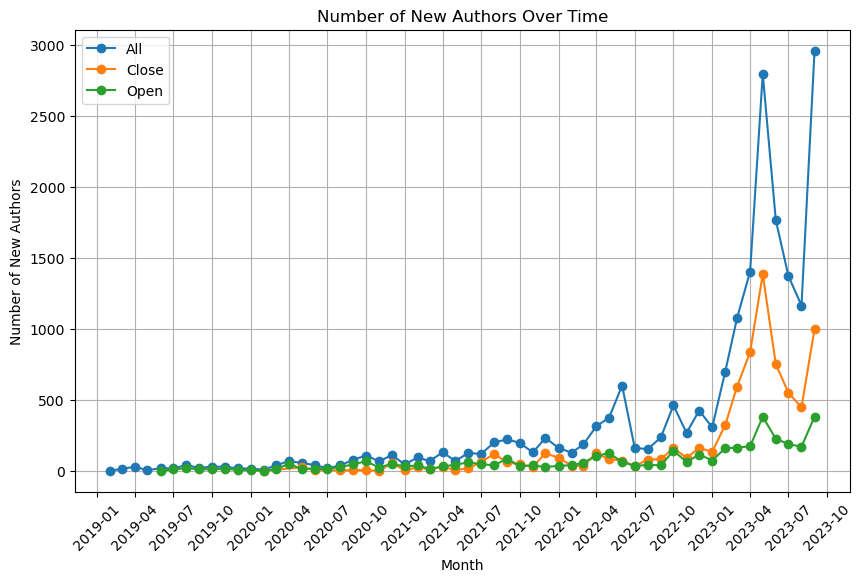

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Initialize an empty set to store unique authors
unique_authors = set()

# Initialize dictionaries to store the count of new authors for each category for each month
new_authors_count_all = {}
new_authors_count_close = {}
new_authors_count_open = {}

# Sort the DataFrame by 'Month'
df = df.sort_values('Month')

# For each row in the DataFrame
for index, row in df.iterrows():
    # Extract the authors
    authors = row['authors_y']
    # For each author
    for author in authors:
        # If the author is not in the set of unique authors
        if author['authorId'] not in unique_authors:
            # Increment the count for the current month for the appropriate category
            new_authors_count_all[row['Month']] = new_authors_count_all.get(row['Month'], 0) + 1
            if row['containClose'] > 0:
                new_authors_count_close[row['Month']] = new_authors_count_close.get(row['Month'], 0) + 1
            if row['containOpen'] > 0:
                new_authors_count_open[row['Month']] = new_authors_count_open.get(row['Month'], 0) + 1
            # Add the author to the set of unique authors
            unique_authors.add(author['authorId'])

# Convert the dictionaries to DataFrames for plotting
df_new_authors_all = pd.DataFrame(list(new_authors_count_all.items()), columns=['Month', 'NewAuthorsAll'])
df_new_authors_close = pd.DataFrame(list(new_authors_count_close.items()), columns=['Month', 'NewAuthorsClose'])
df_new_authors_open = pd.DataFrame(list(new_authors_count_open.items()), columns=['Month', 'NewAuthorsOpen'])

# Convert 'Month' to string in all dataframes
for df_i in [df_new_authors_all, df_new_authors_close, df_new_authors_open]:
    df_i['Month'] = df_i['Month'].astype(str)

# Convert 'Month' back to datetime in all dataframes
for df_i in [df_new_authors_all, df_new_authors_close, df_new_authors_open]:
    df_i['Month'] = pd.to_datetime(df_i['Month'])

# Plot the number of new authors for each category for each month
plt.figure(figsize=(10, 6))
plt.plot(df_new_authors_all['Month'], df_new_authors_all['NewAuthorsAll'], marker='o', label='All')
plt.plot(df_new_authors_close['Month'], df_new_authors_close['NewAuthorsClose'], marker='o', label='Close')
plt.plot(df_new_authors_open['Month'], df_new_authors_open['NewAuthorsOpen'], marker='o', label='Open')

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Number of New Authors')
plt.title('Number of New Authors Over Time')
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility
plt.grid(True)  # add grid
plt.legend()  # add legend
plt.show()

Number of Author

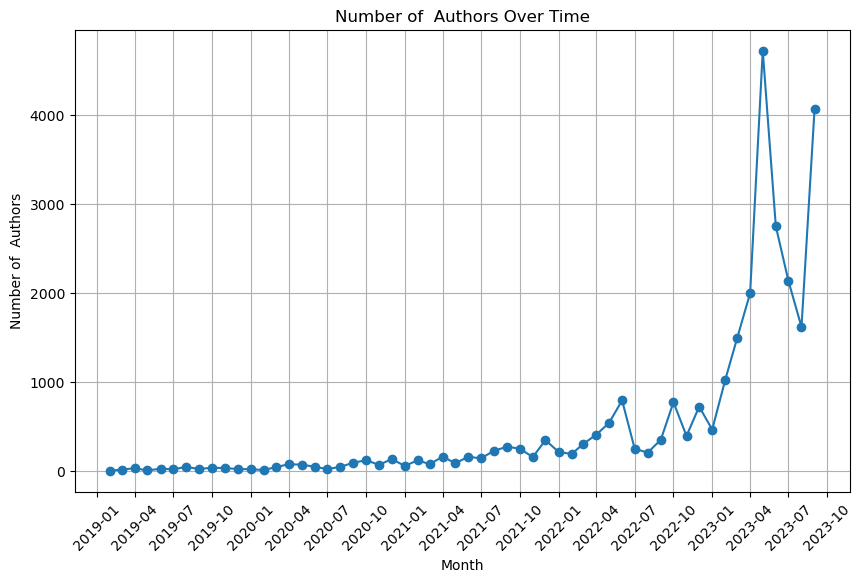

In [23]:
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store the count of new authors for each month
authors_count = {}

# Sort the DataFrame by 'Month'
df = df.sort_values('Month')

# For each row in the DataFrame
for index, row in df.iterrows():
    # Extract the authors
    authors = row['authors_y']
    # For each author
    for author in authors:
        authors_count[row['Month']] = authors_count.get(row['Month'], 0) + 1

# Convert the dictionary to a DataFrame for plotting
df_new_authors = pd.DataFrame(list(authors_count.items()), columns=['Month', 'NewAuthors'])

# Convert 'Month' to string
df_new_authors['Month'] = df_new_authors['Month'].astype(str)

import matplotlib.dates as mdates

# Convert 'Month' back to datetime
df_new_authors['Month'] = pd.to_datetime(df_new_authors['Month'])

# Plot the number of new authors for each month
plt.figure(figsize=(10, 6))
plt.plot(df_new_authors['Month'], df_new_authors['NewAuthors'], marker='o')  # add marker

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Number of  Authors')
plt.title('Number of  Authors Over Time')
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility
plt.grid(True)  # add grid
plt.show()

ratio of new authors

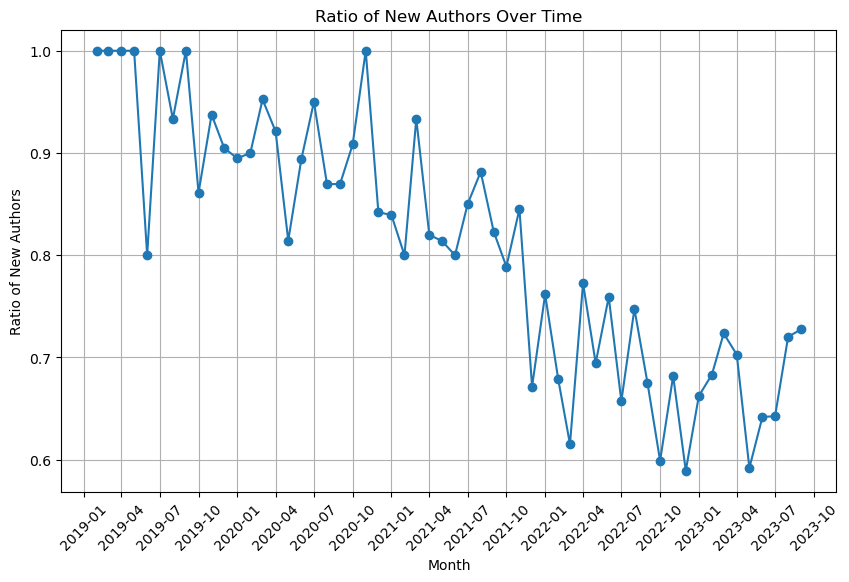

In [24]:
import matplotlib.pyplot as plt

# Initialize an empty set to store unique authors
unique_authors = set()

# Initialize an empty dictionary to store the count of new authors for each month
new_authors_count = {}
# Consider all author
author_count = {}
# Sort the DataFrame by 'Month'
df = df.sort_values('Month')

# For each row in the DataFrame
for index, row in df.iterrows():
    # Extract the authors
    authors = row['authors_y']
    # For each author
    for author in authors:
        author_count[row['Month']] = author_count.get(row['Month'], 0) + 1
        # If the author is not in the set of unique authors
        if author['authorId'] not in unique_authors:
            # Increment the count for the current month
            new_authors_count[row['Month']] = new_authors_count.get(row['Month'], 0) + 1
            # Add the author to the set of unique authors
            unique_authors.add(author['authorId'])

# Convert the dictionary to a DataFrame for plotting
df_new_authors = pd.DataFrame(list(new_authors_count.items()), columns=['Month', 'NewAuthors'])
df_authors = pd.DataFrame(list(author_count.items()), columns=['Month', 'AllAuthors'])

# Convert 'Month' to string
df_new_authors['Month'] = df_new_authors['Month'].astype(str)
df_authors['Month'] = df_authors['Month'].astype(str)

import matplotlib.dates as mdates

# Convert 'Month' back to datetime
df_new_authors['Month'] = pd.to_datetime(df_new_authors['Month'])
df_authors['Month'] = pd.to_datetime(df_authors['Month'])
# Plot the number of new authors for each month
plt.figure(figsize=(10, 6))
plt.plot(df_new_authors['Month'], df_new_authors['NewAuthors']/df_authors['AllAuthors'], marker='o')  # add marker

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Ratio of New Authors')
plt.title('Ratio of New Authors Over Time')
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility
plt.grid(True)  # add grid
plt.show()

In [25]:
df

,id_x,submitter,authors_x,title,comments,journal-ref,doi,report-no,categories,license,...,authors_y,firstSubmitTime,TimeInterval,Month,containOpenAndClose,PureClose,PureOpen,containOpen,containClose,containModel
0,1902.09097,Joe Booth,"Joe Booth, Jackson Booth",Marathon Environments: Multi-Agent Continuous ...,AAAI-2019 Workshop on Games and Simulations fo...,AAAI-2019 Workshop on Games and Simulations fo...,NaN,NaN,cs.AI cs.LG cs.MA,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[{'authorId': '37373648', 'name': 'J. Booth'},...",2019-02-25 05:56:00,NaN,2019-02,0,0,0,0,0,0
1,1903.01669,Vijaya Sai Krishna Gottipati,"Sai Krishna, Keehong Seo, Dhaivat Bhatt, Vince...",Deep Active Localization,10 pages,NaN,NaN,NaN,cs.RO cs.AI cs.LG stat.ML,http://creativecommons.org/publicdomain/zero/1.0/,...,"[{'authorId': '1381860090', 'name': 'Sai Krish...",2019-03-05 05:00:00,191.066667,2019-03,0,0,0,0,0,0
2,1903.08855,Nelson F. Liu,Nelson F. Liu and Matt Gardner and Yonatan Bel...,Linguistic Knowledge and Transferability of Co...,"22 pages, 4 figures; to appear at NAACL 2019",NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[{'authorId': '22243769', 'name': 'Nelson F. L...",2019-03-21 07:19:00,386.316667,2019-03,0,0,0,0,0,0
3,1903.09295,'Stephen' Zhen Gou,"Stephen Zhen Gou, Yuyang Liu",DQN with model-based exploration: efficient le...,NaN,NaN,NaN,NaN,cs.LG stat.ML,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[{'authorId': '117387024', 'name': 'Stephen Go...",2019-03-22 01:41:00,18.366667,2019-03,0,0,0,0,0,0
4,1903.11437,Franck Burlot,Franck Burlot and Fran\c{c}ois Yvon,Using Monolingual Data in Neural Machine Trans...,Published in the Proceedings of the Third Conf...,NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[{'authorId': '3456893', 'name': 'Franck Burlo...",2019-03-27 14:11:00,132.500000,2019-03,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073,2310.00212,Tianhao Wu,"Tianhao Wu, Banghua Zhu, Ruoyu Zhang, Zhaojin ...",Pairwise Proximal Policy Optimization: Harness...,"19 pages, 5 figures",NaN,NaN,NaN,cs.LG cs.AI cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[{'authorId': '2251528079', 'name': 'Tianhao W...",2023-09-30 01:23:00,1.216667,2023-09,0,0,0,0,0,0
5068,2310.00117,Mohi Reza,"Mohi Reza, Nathan Laundry, Ilya Musabirov, Pet...",ABScribe: Rapid Exploration of Multiple Writin...,NaN,NaN,NaN,NaN,cs.HC cs.AI cs.LG,http://creativecommons.org/licenses/by/4.0/,...,"[{'authorId': '32206132', 'name': 'Mohi Reza'}...",2023-09-29 20:11:00,1.083333,2023-09,0,0,0,0,0,0
5050,2309.17272,Shuai Lu,"Baizhou Huang, Shuai Lu, Weizhu Chen, Xiaojun ...",Enhancing Large Language Models in Coding Thro...,Preprint version,NaN,NaN,NaN,cs.CL cs.AI cs.SE,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[{'authorId': '2184278672', 'name': 'Baizhou H...",2023-09-29 14:23:00,0.466667,2023-09,0,1,0,0,1,1
5085,2310.00385,Fei Zhao,"Fei Zhao, Taotian Pang, Zhen Wu, Zheng Ma, Shu...",Dynamic Demonstrations Controller for In-Conte...,Under review,NaN,NaN,NaN,cs.CL cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,...,"[{'authorId': '2152335026', 'name': 'Fei Zhao'...",2023-09-30 14:04:00,0.283333,2023-09,0,0,0,0,0,0


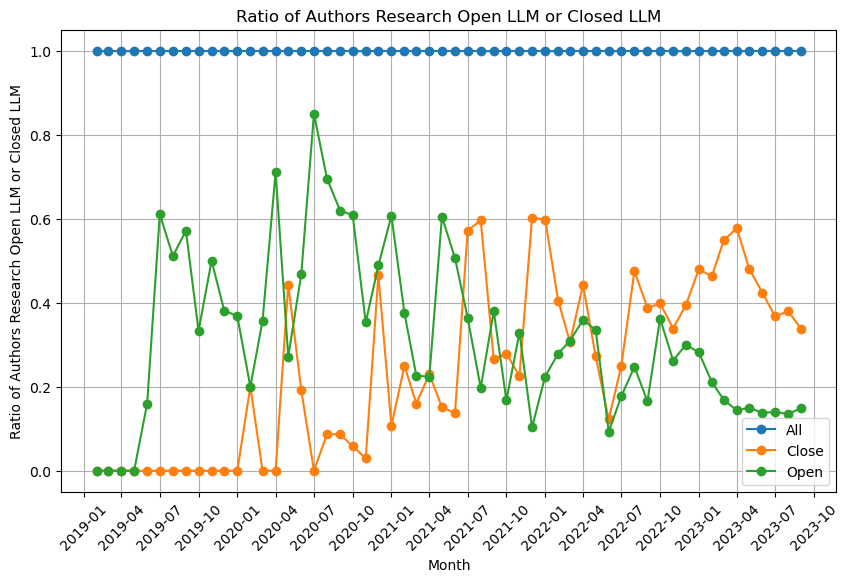

In [49]:
# Initialize an empty set to store unique authors
unique_authors = set()

# Initialize dictionaries to store the count of new authors for each category for each month
new_authors_count_all = {}
new_authors_count_model = {}
new_authors_count_close = {}
new_authors_count_open = {}
authors_count_model = {}
authors_count_close = {}
authors_count_open = {}

# For each row in the DataFrame
for index, row in df.iterrows():
    # Extract the authors
    authors = row['authors_y']
    # For each author
    for author in authors:
        if row['containModel'] > 0:
            authors_count_model[row['Month']] = authors_count_model.get(row['Month'], 0) + 1
        if row['containClose'] > 0:
            authors_count_close[row['Month']] = authors_count_close.get(row['Month'], 0) + 1
        if row['containOpen'] > 0:
            authors_count_open[row['Month']] = authors_count_open.get(row['Month'], 0) + 1

        # If the author is not in the set of unique authors
        if author['authorId'] not in unique_authors:
            # Increment the count for the current month for the appropriate category
            new_authors_count_all[row['Month']] = new_authors_count_all.get(row['Month'], 0) + 1
            if row['containModel'] > 0:
                new_authors_count_model[row['Month']] = new_authors_count_model.get(row['Month'], 0) + 1
            if row['containClose'] > 0:
                new_authors_count_close[row['Month']] = new_authors_count_close.get(row['Month'], 0) + 1
            if row['containOpen'] > 0:
                new_authors_count_open[row['Month']] = new_authors_count_open.get(row['Month'], 0) + 1
            # Add the author to the set of unique authors
            unique_authors.add(author['authorId'])

# Convert the dictionaries to DataFrames for plotting
df_new_authors_all = pd.DataFrame(list(new_authors_count_all.items()), columns=['Month', 'NewAuthorsAll'])
df_new_authors_model = pd.DataFrame(list(new_authors_count_model.items()), columns=['Month', 'NewAuthorsModel'])
df_new_authors_close = pd.DataFrame(list(new_authors_count_close.items()), columns=['Month', 'NewAuthorsClose'])
df_new_authors_open = pd.DataFrame(list(new_authors_count_open.items()), columns=['Month', 'NewAuthorsOpen'])
df_authors_model = pd.DataFrame(list(authors_count_model.items()), columns=['Month', 'AllAuthorsModel'])
df_authors_close = pd.DataFrame(list(authors_count_close.items()), columns=['Month', 'AllAuthorsClose'])
df_authors_open = pd.DataFrame(list(authors_count_open.items()), columns=['Month', 'AllAuthorsOpen'])

# Convert 'Month' to datetime in df_authors
df_authors['Month'] = pd.to_datetime(df_authors['Month'])

# Convert 'Month' to datetime in other dataframes
for df_i in [df_new_authors_all, df_new_authors_model, df_new_authors_close, df_new_authors_open, df_authors_model, df_authors_close, df_authors_open]:
    df_i['Month'] = df_i['Month'].dt.to_timestamp()

# Merge the dataframes on 'Month'
df_keep_same_len = pd.merge(df_authors, df_new_authors_all, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_new_authors_model, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_new_authors_close, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_new_authors_open, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_authors_model, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_authors_close, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_authors_open, on='Month', how='outer')


# Fill NaN values with 0
df_keep_same_len.fillna(0, inplace=True)

# Plot the ratio of new authors for each category for each month
plt.figure(figsize=(10, 6))
plt.plot(df_keep_same_len['Month'], df_keep_same_len['AllAuthors']/df_keep_same_len['AllAuthors'], marker='o', label='All')
# plt.plot(df_keep_same_len['Month'], df_keep_same_len['AllAuthorsModel']/df_keep_same_len['AllAuthors'], marker='o', label='Model')
plt.plot(df_keep_same_len['Month'], df_keep_same_len['AllAuthorsClose']/df_keep_same_len['AllAuthors'], marker='o', label='Close')
plt.plot(df_keep_same_len['Month'], df_keep_same_len['AllAuthorsOpen']/df_keep_same_len['AllAuthors'], marker='o', label='Open')

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Ratio of Authors Research Open LLM or Closed LLM')
plt.title('Ratio of Authors Research Open LLM or Closed LLM')
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility
plt.grid(True)  # add grid
plt.legend()  # add legend
plt.show()

C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\3112446806.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='AuthorAll', data=df_authors, ci=95, label='All', marker='o', markersize=3)
C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\3112446806.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='AuthorClose', data=df_authors, ci=95, label='Close', marker='o', markersize=3)
C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\3112446806.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='AuthorOpen', data=df_authors, ci=95, label='Open', marker='o', markersize=3)


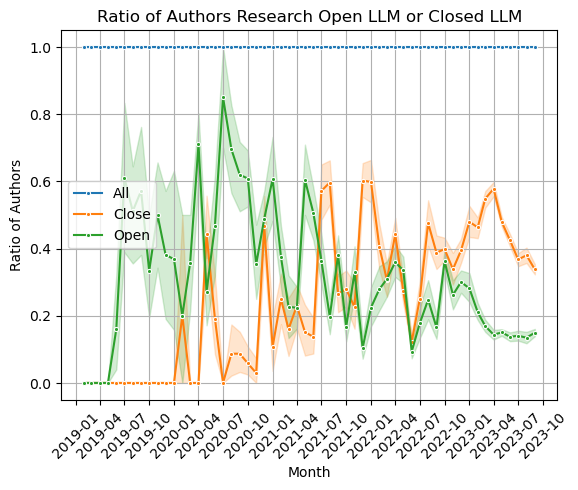

In [81]:
# Initialize an empty list to store the data
data = []
# For each row in the DataFrame
for index, row in df.iterrows():
    # Extract the authors
    authors = row['authors_y']
    # For each author
    for author in authors:
        # Create a dictionary to store the data for this author
        author_data = {'Month': row['Month'], 'AuthorId': author['authorId']}
        # Determine whether the author is a new author in each category
        author_data['AuthorAll'] = 1
        author_data['AuthorModel'] = row['containModel']
        author_data['AuthorClose'] = row['containClose']
        author_data['AuthorOpen'] = row['containOpen']
        # Add the data for this author to the list
        data.append(author_data)

# Convert the list to a DataFrame
df_authors = pd.DataFrame(data)

# Convert 'Month' to datetime
df_authors['Month'] = df_authors['Month'].dt.to_timestamp()

# Now you can use seaborn's lineplot function to plot the data with a 95% confidence interval
sns.lineplot(x='Month', y='AuthorAll', data=df_authors, ci=95, label='All', marker='o', markersize=3)
# sns.lineplot(x='Month', y='IsNewAuthorModel', data=df_authors, ci=95, label='Model')
sns.lineplot(x='Month', y='AuthorClose', data=df_authors, ci=95, label='Close', marker='o', markersize=3)
sns.lineplot(x='Month', y='AuthorOpen', data=df_authors, ci=95, label='Open', marker='o', markersize=3)

# Set the title and y-axis label
plt.title('Ratio of Authors Research Open LLM or Closed LLM')
plt.ylabel('Ratio of Authors')
plt.grid()
# Adjust the x-axis to have a three-month interval and a 45-degree rotation
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Show the plot
plt.show()

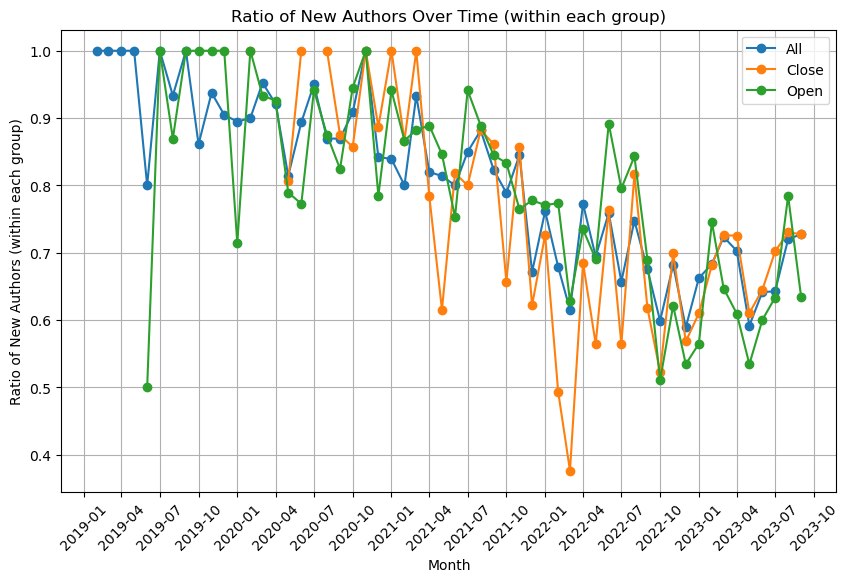

In [46]:
# Initialize an empty set to store unique authors
unique_authors = set()

# Initialize dictionaries to store the count of new authors for each category for each month
new_authors_count_all = {}
new_authors_count_model = {}
new_authors_count_close = {}
new_authors_count_open = {}
authors_count_model = {}
authors_count_close = {}
authors_count_open = {}

# For each row in the DataFrame
for index, row in df.iterrows():
    # Extract the authors
    authors = row['authors_y']
    # For each author
    for author in authors:
        if row['containModel'] > 0:
            authors_count_model[row['Month']] = authors_count_model.get(row['Month'], 0) + 1
        if row['containClose'] > 0:
            authors_count_close[row['Month']] = authors_count_close.get(row['Month'], 0) + 1
        if row['containOpen'] > 0:
            authors_count_open[row['Month']] = authors_count_open.get(row['Month'], 0) + 1

        # If the author is not in the set of unique authors
        if author['authorId'] not in unique_authors:
            # Increment the count for the current month for the appropriate category
            new_authors_count_all[row['Month']] = new_authors_count_all.get(row['Month'], 0) + 1
            if row['containModel'] > 0:
                new_authors_count_model[row['Month']] = new_authors_count_model.get(row['Month'], 0) + 1
            if row['containClose'] > 0:
                new_authors_count_close[row['Month']] = new_authors_count_close.get(row['Month'], 0) + 1
            if row['containOpen'] > 0:
                new_authors_count_open[row['Month']] = new_authors_count_open.get(row['Month'], 0) + 1
            # Add the author to the set of unique authors
            unique_authors.add(author['authorId'])

# Convert the dictionaries to DataFrames for plotting
df_new_authors_all = pd.DataFrame(list(new_authors_count_all.items()), columns=['Month', 'NewAuthorsAll'])
df_new_authors_model = pd.DataFrame(list(new_authors_count_model.items()), columns=['Month', 'NewAuthorsModel'])
df_new_authors_close = pd.DataFrame(list(new_authors_count_close.items()), columns=['Month', 'NewAuthorsClose'])
df_new_authors_open = pd.DataFrame(list(new_authors_count_open.items()), columns=['Month', 'NewAuthorsOpen'])
df_authors_model = pd.DataFrame(list(authors_count_model.items()), columns=['Month', 'AllAuthorsModel'])
df_authors_close = pd.DataFrame(list(authors_count_close.items()), columns=['Month', 'AllAuthorsClose'])
df_authors_open = pd.DataFrame(list(authors_count_open.items()), columns=['Month', 'AllAuthorsOpen'])

# Convert 'Month' to datetime in df_authors
df_authors['Month'] = pd.to_datetime(df_authors['Month'])

# Convert 'Month' to datetime in other dataframes
for df_i in [df_new_authors_all, df_new_authors_model, df_new_authors_close, df_new_authors_open, df_authors_model, df_authors_close, df_authors_open]:
    df_i['Month'] = df_i['Month'].dt.to_timestamp()

# Merge the dataframes on 'Month'
df_keep_same_len = pd.merge(df_authors, df_new_authors_all, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_new_authors_model, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_new_authors_close, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_new_authors_open, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_authors_model, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_authors_close, on='Month', how='outer')
df_keep_same_len = pd.merge(df_keep_same_len, df_authors_open, on='Month', how='outer')


# Fill NaN values with 0
df_keep_same_len.fillna(0, inplace=True)

# Plot the ratio of new authors for each category for each month
plt.figure(figsize=(10, 6))
plt.plot(df_keep_same_len['Month'], df_keep_same_len['NewAuthorsAll']/df_keep_same_len['AllAuthors'], marker='o', label='All')
# plt.plot(df_keep_same_len['Month'], df_keep_same_len['NewAuthorsModel']/df_keep_same_len['AllAuthors'], marker='o', label='Model')
plt.plot(df_keep_same_len['Month'], df_keep_same_len['NewAuthorsClose']/df_keep_same_len['AllAuthorsClose'], marker='o', label='Close')
plt.plot(df_keep_same_len['Month'], df_keep_same_len['NewAuthorsOpen']/df_keep_same_len['AllAuthorsOpen'], marker='o', label='Open')

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Ratio of New Authors (within each group)')
plt.title('Ratio of New Authors Over Time (within each group)')
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility
plt.grid(True)  # add grid
plt.legend()  # add legend
plt.show()

C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\769908240.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='IsNewAuthorAll', data=df_authors, ci=95, label='All', marker='o', markersize=3)
C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\769908240.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='IsNewAuthorClose', data=df_authors[df_authors['TotalAuthorsClose'] == 1], ci=95, label='Close', marker='o', markersize=3)
C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\769908240.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='IsNewAuthorOpen', data=df_authors[df_authors['TotalAuthorsOpen'] == 1], ci=95, label='Open', marker='o', markersize=3)


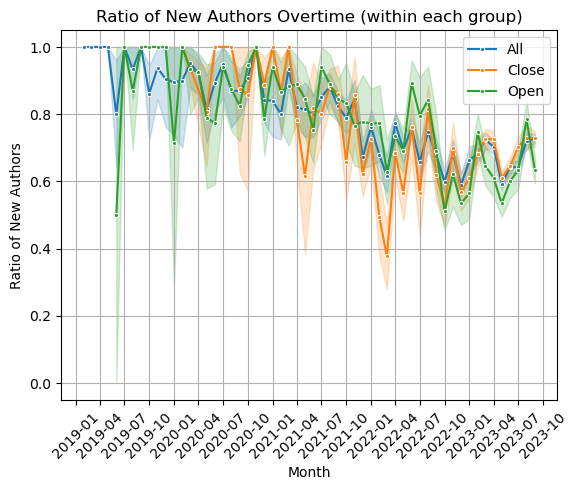

In [82]:
# Initialize an empty list to store the data
data = []
unique_authors = set()

# For each row in the DataFrame
for index, row in df.iterrows():
    # Extract the authors
    authors = row['authors_y']
    # For each author
    for author in authors:
        # Create a dictionary to store the data for this author
        author_data = {'Month': row['Month'], 'AuthorId': author['authorId']}
        # Determine whether the author is a new author in each category
        author_data['IsNewAuthorAll'] = author['authorId'] not in unique_authors
        author_data['IsNewAuthorModel'] = row['containModel'] > 0 and author_data['IsNewAuthorAll']
        author_data['IsNewAuthorClose'] = row['containClose'] > 0 and author_data['IsNewAuthorAll']
        author_data['IsNewAuthorOpen'] = row['containOpen'] > 0 and author_data['IsNewAuthorAll']
        # Add the author to the set of unique authors
        unique_authors.add(author['authorId'])
        # Add the total count of authors for each category
        author_data['TotalAuthorsModel'] = row['containModel'] > 0
        author_data['TotalAuthorsClose'] = row['containClose'] > 0
        author_data['TotalAuthorsOpen'] = row['containOpen'] > 0
        # Add the data for this author to the list
        data.append(author_data)

# Convert the list to a DataFrame
df_authors = pd.DataFrame(data)

# Convert 'Month' to datetime
df_authors['Month'] = df_authors['Month'].dt.to_timestamp()

# Now you can use seaborn's lineplot function to plot the data with a 95% confidence interval
sns.lineplot(x='Month', y='IsNewAuthorAll', data=df_authors, ci=95, label='All', marker='o', markersize=3)
# sns.lineplot(x='Month', y='IsNewAuthorModel', data=df_authors[df_authors['TotalAuthorsModel'] == 1], ci=95, label='Model')
sns.lineplot(x='Month', y='IsNewAuthorClose', data=df_authors[df_authors['TotalAuthorsClose'] == 1], ci=95, label='Close', marker='o', markersize=3)
sns.lineplot(x='Month', y='IsNewAuthorOpen', data=df_authors[df_authors['TotalAuthorsOpen'] == 1], ci=95, label='Open', marker='o', markersize=3)

# Set the title and y-axis label
plt.title('Ratio of New Authors Overtime (within each group)')
plt.ylabel('Ratio of New Authors')

plt.grid()
# Adjust the x-axis to have a three-month interval and a 45-degree rotation
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [72]:
df_authors

,Month,AuthorId,IsNewAuthorAll,IsNewAuthorModel,IsNewAuthorClose,IsNewAuthorOpen
0,2019-02-01,37373648,True,False,False,False
1,2019-02-01,123030248,True,False,False,False
2,2019-03-01,1381860090,True,False,False,False
3,2019-03-01,1748498,True,False,False,False
4,2019-03-01,8262425,True,False,False,False
...,...,...,...,...,...,...
28468,2023-09-01,2108276402,False,False,False,False
28469,2023-09-01,2243367575,False,False,False,False
28470,2023-09-01,2250363276,True,False,False,False
28471,2023-09-01,2256183798,True,False,False,False


Number of Author with different H index

New AI Players in different fields

In [27]:
df_merged['authors_y'] = df_merged['authors_y'].apply(ast.literal_eval)
df_merged

,id_x,submitter,authors_x,title,comments,journal-ref,doi,report-no,categories,license,...,influentialCitationCount,isOpenAccess,fieldsOfStudy,s2FieldsOfStudy,authors_y,firstSubmitTime,TimeInterval,Month,category,MonthGroupTimeInterval
index,,,,,,,,,,,,,,,,,,,,,
0,1902.09097,Joe Booth,"Joe Booth, Jackson Booth",Marathon Environments: Multi-Agent Continuous ...,AAAI-2019 Workshop on Games and Simulations fo...,AAAI-2019 Workshop on Games and Simulations fo...,NaN,NaN,cs.AI cs.LG cs.MA,http://arxiv.org/licenses/nonexclusive-distrib...,...,0.0,False,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '37373648', 'name': 'J. Booth'},...",2019-02-25 05:56:00,NaN,2019-02,cs.AI,NaN
0,1902.09097,Joe Booth,"Joe Booth, Jackson Booth",Marathon Environments: Multi-Agent Continuous ...,AAAI-2019 Workshop on Games and Simulations fo...,AAAI-2019 Workshop on Games and Simulations fo...,NaN,NaN,cs.AI cs.LG cs.MA,http://arxiv.org/licenses/nonexclusive-distrib...,...,0.0,False,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '37373648', 'name': 'J. Booth'},...",2019-02-25 05:56:00,NaN,2019-02,cs.LG,NaN
0,1902.09097,Joe Booth,"Joe Booth, Jackson Booth",Marathon Environments: Multi-Agent Continuous ...,AAAI-2019 Workshop on Games and Simulations fo...,AAAI-2019 Workshop on Games and Simulations fo...,NaN,NaN,cs.AI cs.LG cs.MA,http://arxiv.org/licenses/nonexclusive-distrib...,...,0.0,False,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '37373648', 'name': 'J. Booth'},...",2019-02-25 05:56:00,NaN,2019-02,cs.MA,NaN
1,1903.01669,Vijaya Sai Krishna Gottipati,"Sai Krishna, Keehong Seo, Dhaivat Bhatt, Vince...",Deep Active Localization,10 pages,NaN,NaN,NaN,cs.RO cs.AI cs.LG stat.ML,http://creativecommons.org/publicdomain/zero/1.0/,...,0.0,True,"['Engineering', 'Computer Science', 'Mathemati...","[{'category': 'Engineering', 'source': 'extern...","[{'authorId': '1381860090', 'name': 'Sai Krish...",2019-03-05 05:00:00,191.066667,2019-03,cs.RO,NaN
1,1903.01669,Vijaya Sai Krishna Gottipati,"Sai Krishna, Keehong Seo, Dhaivat Bhatt, Vince...",Deep Active Localization,10 pages,NaN,NaN,NaN,cs.RO cs.AI cs.LG stat.ML,http://creativecommons.org/publicdomain/zero/1.0/,...,0.0,True,"['Engineering', 'Computer Science', 'Mathemati...","[{'category': 'Engineering', 'source': 'extern...","[{'authorId': '1381860090', 'name': 'Sai Krish...",2019-03-05 05:00:00,191.066667,2019-03,cs.AI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,2310.00483,Vincent Li,"Vincent Li, Nick Doiron",Prompting Code Interpreter to Write Better Uni...,"13 pages (including appendices), 0 figures, 1 ...",NaN,NaN,NaN,cs.SE cs.LG,http://creativecommons.org/licenses/by-nc-sa/4.0/,...,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '2249759382', 'name': 'Vincent L...",2023-09-30 20:36:00,0.166667,2023-09,cs.LG,12.516667
5088,2310.00483,Vincent Li,"Vincent Li, Nick Doiron",Prompting Code Interpreter to Write Better Uni...,"13 pages (including appendices), 0 figures, 1 ...",NaN,NaN,NaN,cs.SE cs.LG,http://creativecommons.org/licenses/by-nc-sa/4.0/,...,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '2249759382', 'name': 'Vincent L...",2023-09-30 20:36:00,0.166667,2023-09,cs.SE,5.850000
5089,2310.00492,Xuansheng Wu,"Xuansheng Wu, Wenlin Yao, Jianshu Chen, Xiaoma...",From Language Modeling to Instruction Followin...,"28 pages, 13 figures, 12 tables",NaN,NaN,NaN,cs.CL cs.AI cs.LG,http://creativecommons.org/licenses/by-nc-nd/4.0/,...,0.0,True,['Computer Science'],"[{'category': 'Computer Science', 'source': 'e...","[{'authorId': '2145346360', 'name': 'Xuansheng...",2023-09-30 21:16:00,0.666667,2023-09,cs.LG,0.666667


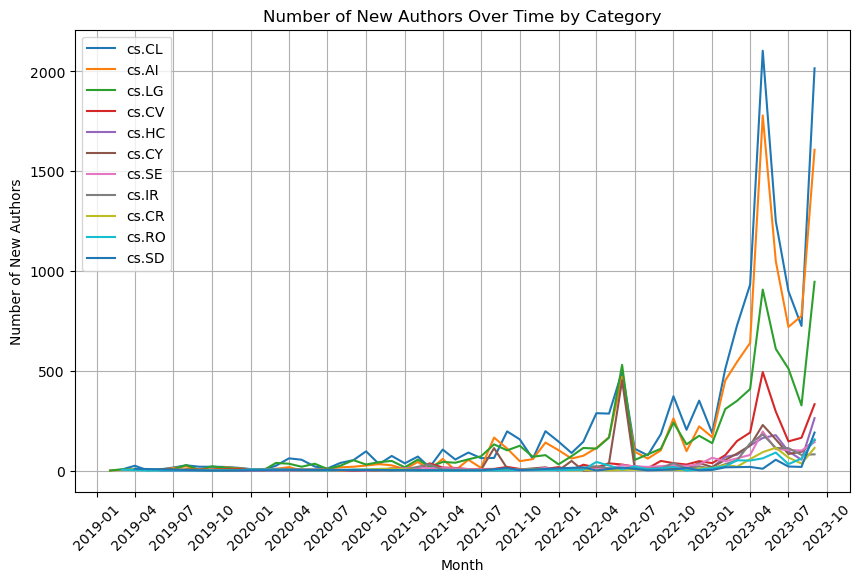

In [28]:
# Initialize dictionaries
unique_authors = {}
new_authors_count = {}


# Specify the categories
categories = ['cs.CL', 'cs.AI', 'cs.LG', 'cs.CV', 'cs.HC', 'cs.CY', 'cs.SE', 'cs.IR', 'cs.CR', 'cs.RO', 'cs.SD']
# Filter the DataFrame
df_merged = df_merged[df_merged['category'].isin(categories)]
# Sort DataFrame
df_merged = df_merged.sort_values('Month')

# Count new authors for each month and category
for index, row in df_merged.iterrows():
    authors = row['authors_y']
    category = row['category']
    unique_authors.setdefault(category, set())
    for author in authors:
        if author['authorId'] not in unique_authors[category]:
            new_authors_count.setdefault(category, {}).setdefault(row['Month'], 0)
            new_authors_count[category][row['Month']] += 1
            unique_authors[category].add(author['authorId'])

# Convert to DataFrame
df_new_authors = pd.DataFrame({(i,j): new_authors_count[i][j] 
                               for i in new_authors_count.keys() 
                               for j in new_authors_count[i].keys()}, 
                              index=['NewAuthors']).T.reset_index()
df_new_authors.columns = ['Category', 'Month', 'NewAuthors']

# Convert 'Month' to timestamp
df_new_authors['Month'] = df_new_authors['Month'].apply(lambda x: x.to_timestamp())

# Plot
plt.figure(figsize=(10, 6))
for category in categories:  # loop over categories in the specified order
    df_category = df_new_authors[df_new_authors['Category'] == category]
    plt.plot(df_category['Month'], df_category['NewAuthors'],  label=category)

# Set x-axis ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Number of New Authors')
plt.title('Number of New Authors Over Time by Category')
plt.legend()
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

# official version

if venue == 'arXiv.org', un official version

In [29]:
## official version ratio by (first submit) time; by category

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5098 entries, 0 to 5089
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_x                      5098 non-null   float64       
 1   submitter                 5098 non-null   object        
 2   authors_x                 5098 non-null   object        
 3   title                     5098 non-null   object        
 4   comments                  2732 non-null   object        
 5   journal-ref               143 non-null    object        
 6   doi                       176 non-null    object        
 7   report-no                 8 non-null      object        
 8   categories                5098 non-null   object        
 9   license                   5098 non-null   object        
 10  abstract                  5098 non-null   object        
 11  versions                  5098 non-null   object        
 12  update_date         

In [30]:
# Create a new column 'IsOfficial'
df['IsOfficial'] = df['venue'].apply(lambda x: 0 if x == 'arXiv.org' else 1)

# Group by 'Month' and calculate the mean of 'IsOfficial'
df_monthly_ratio = df.groupby('Month')['IsOfficial'].mean()

# Convert 'Month' to timestamp
df_monthly_ratio.index = df_monthly_ratio.index.to_timestamp()

# The result is a Series with 'Month' as the index and the ratio of official versions as the values

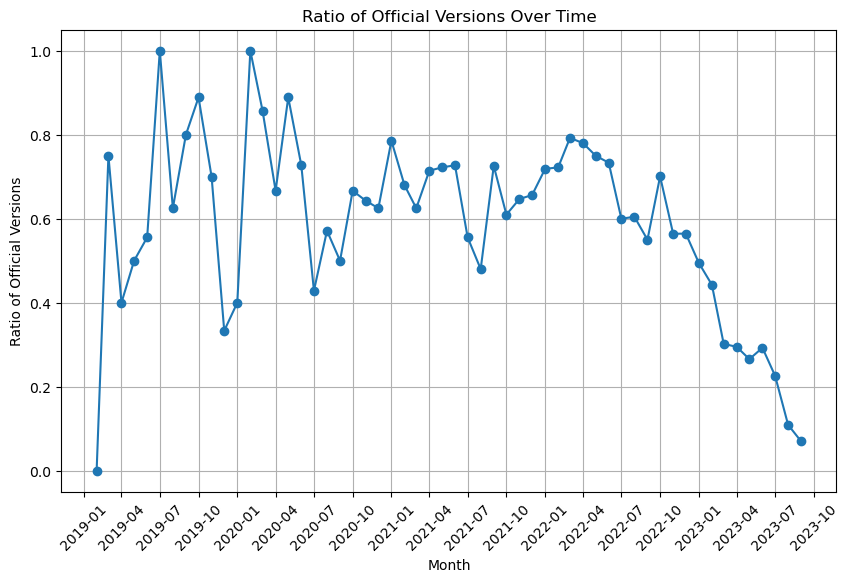

In [31]:
# Plot the ratio of official versions over time
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_ratio.index, df_monthly_ratio.values, marker='o')

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Ratio of Official Versions')
plt.title('Ratio of Official Versions Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
plt.show()

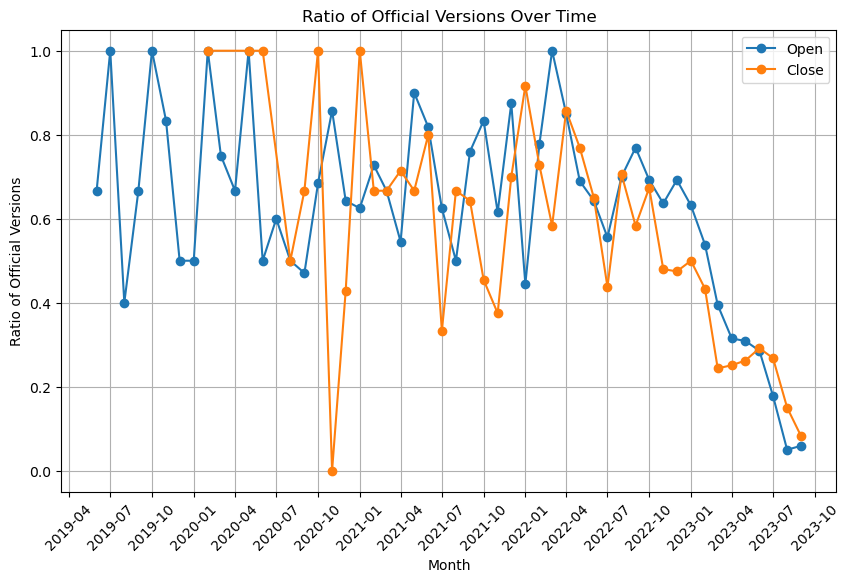

In [56]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Group by 'Month' and calculate the mean of 'IsOfficial' for all, 'containOpen', 'containClose', 'PureOpen', and 'PureClose'
df_monthly_ratio_all = df.groupby('Month')['IsOfficial'].mean()
df_monthly_ratio_open = df[df['containOpen'] == 1].groupby('Month')['IsOfficial'].mean()
df_monthly_ratio_close = df[df['containClose'] == 1].groupby('Month')['IsOfficial'].mean()
df_monthly_ratio_pure_open = df[df['PureOpen'] == 1].groupby('Month')['IsOfficial'].mean()
df_monthly_ratio_pure_close = df[df['PureClose'] == 1].groupby('Month')['IsOfficial'].mean()

# Convert 'Month' to timestamp for all series
df_monthly_ratio_all.index = df_monthly_ratio_all.index.to_timestamp()
df_monthly_ratio_open.index = df_monthly_ratio_open.index.to_timestamp()
df_monthly_ratio_close.index = df_monthly_ratio_close.index.to_timestamp()
df_monthly_ratio_pure_open.index = df_monthly_ratio_pure_open.index.to_timestamp()
df_monthly_ratio_pure_close.index = df_monthly_ratio_pure_close.index.to_timestamp()

plt.figure(figsize=(10, 6))
# plt.plot(df_monthly_ratio_all.index, df_monthly_ratio_all.values, marker='o', label='All')
plt.plot(df_monthly_ratio_open.index, df_monthly_ratio_open.values, marker='o', label='Open')
plt.plot(df_monthly_ratio_close.index, df_monthly_ratio_close.values, marker='o', label='Close')
# plt.plot(df_monthly_ratio_pure_open.index, df_monthly_ratio_pure_open.values, marker='o', label='Pure Open')
# plt.plot(df_monthly_ratio_pure_close.index, df_monthly_ratio_pure_close.values, marker='o', label='Pure Close')

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Ratio of Official Versions')
plt.title('Ratio of Official Versions Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
plt.legend()  # add legend
plt.show()

C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\156380607.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='IsOfficial', data=df_open, label='Open', ci=95)
C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\156380607.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='IsOfficial', data=df_close, label='Close', ci=95)


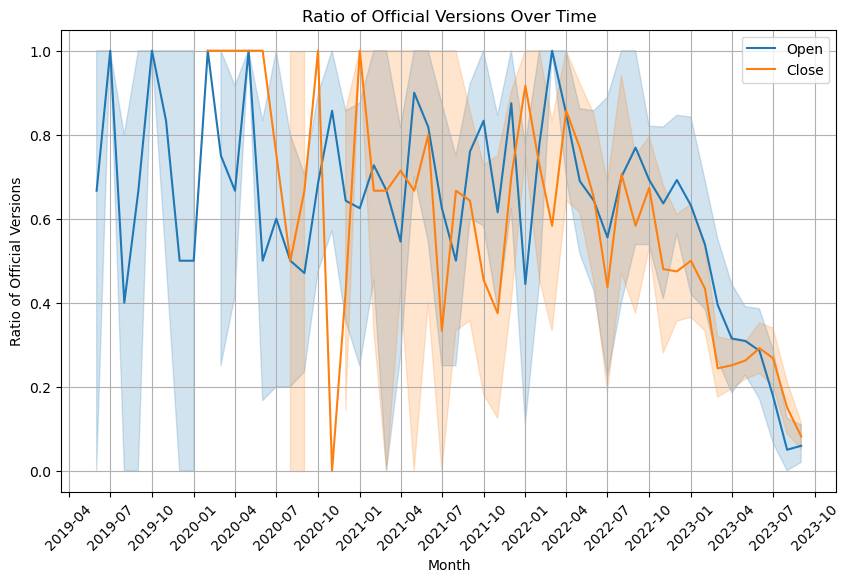

In [57]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Create new dataframes for 'containOpen' and 'containClose' with 'Month' and 'IsOfficial' columns
df_open = df[df['containOpen'] == 1][['Month', 'IsOfficial']]
df_close = df[df['containClose'] == 1][['Month', 'IsOfficial']]

# Convert 'Month' to timestamp for both dataframes
df_open['Month'] = df_open['Month'].dt.to_timestamp()
df_close['Month'] = df_close['Month'].dt.to_timestamp()

plt.figure(figsize=(10, 6))

# Use seaborn lineplot to plot with 95% confidence interval
sns.lineplot(x='Month', y='IsOfficial', data=df_open, label='Open', ci=95)
sns.lineplot(x='Month', y='IsOfficial', data=df_close, label='Close', ci=95)

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Ratio of Official Versions')
plt.title('Ratio of Official Versions Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
plt.legend()  # add legend
plt.show()

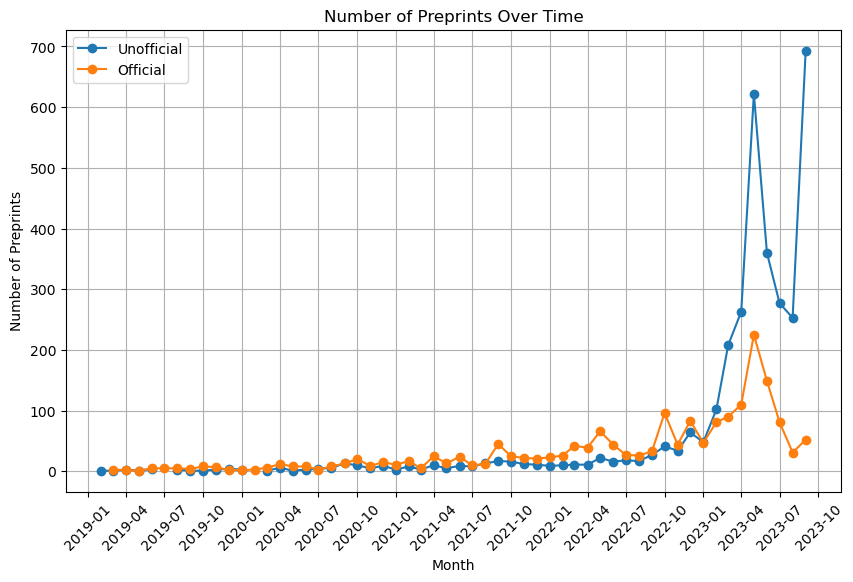

In [32]:
# Group by 'Month' and 'IsOfficial' and count the number of preprints
df_monthly_counts = df.groupby(['Month', 'IsOfficial']).size().unstack()

# Convert 'Month' to timestamp
df_monthly_counts.index = df_monthly_counts.index.to_timestamp()

# Plot the number of preprints over time
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_counts.index, df_monthly_counts[0], marker='o', label='Unofficial')
plt.plot(df_monthly_counts.index, df_monthly_counts[1], marker='o', label='Official')

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Number of Preprints')
plt.title('Number of Preprints Over Time')
plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
plt.legend()
plt.grid(True)
plt.show()

update speed

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5098 entries, 0 to 5089
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_x                      5098 non-null   float64       
 1   submitter                 5098 non-null   object        
 2   authors_x                 5098 non-null   object        
 3   title                     5098 non-null   object        
 4   comments                  2732 non-null   object        
 5   journal-ref               143 non-null    object        
 6   doi                       176 non-null    object        
 7   report-no                 8 non-null      object        
 8   categories                5098 non-null   object        
 9   license                   5098 non-null   object        
 10  abstract                  5098 non-null   object        
 11  versions                  5098 non-null   object        
 12  update_date         

In [34]:
from datetime import timedelta

# Function to calculate update speed
def calculate_update_speed(versions):
    # Sort versions by 'created' date
    versions_sorted = sorted(versions, key=lambda x: x['created'])
    
    # Calculate the number of updates
    num_updates = len(versions_sorted) - 1
    
    # Calculate the time span in days
    time_span = (versions_sorted[-1]['created'] - versions_sorted[0]['created']).days
    
    # Avoid division by zero
    if time_span == 0:
        return 0
    
    # Calculate and return the update speed
    return num_updates / time_span

# Apply the function to the 'versions' column to get the update speed for each preprint
df['UpdateSpeed'] = df['versions'].apply(calculate_update_speed)

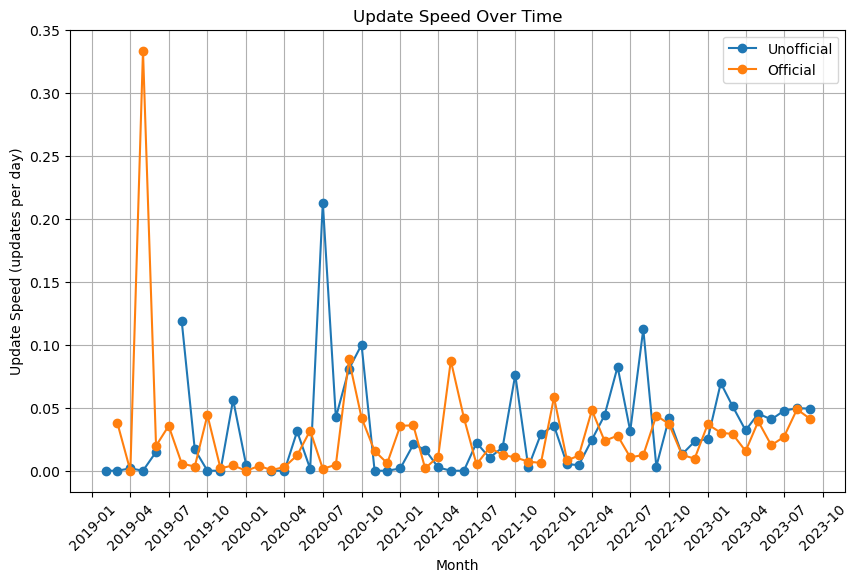

In [35]:
# Group by 'Month' and 'IsOfficial' and calculate the mean update speed
df_monthly_speeds = df.groupby(['Month', 'IsOfficial'])['UpdateSpeed'].mean().unstack()

# Convert 'Month' to timestamp
df_monthly_speeds.index = df_monthly_speeds.index.to_timestamp()

# Plot the update speed over time
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_speeds.index, df_monthly_speeds[0], marker='o', label='Unofficial')
plt.plot(df_monthly_speeds.index, df_monthly_speeds[1], marker='o', label='Official')

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Update Speed (updates per day)')
plt.title('Update Speed Over Time')
plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
plt.legend()
plt.grid(True)
plt.show()

In [36]:
## number of version by (first submit) time; by category

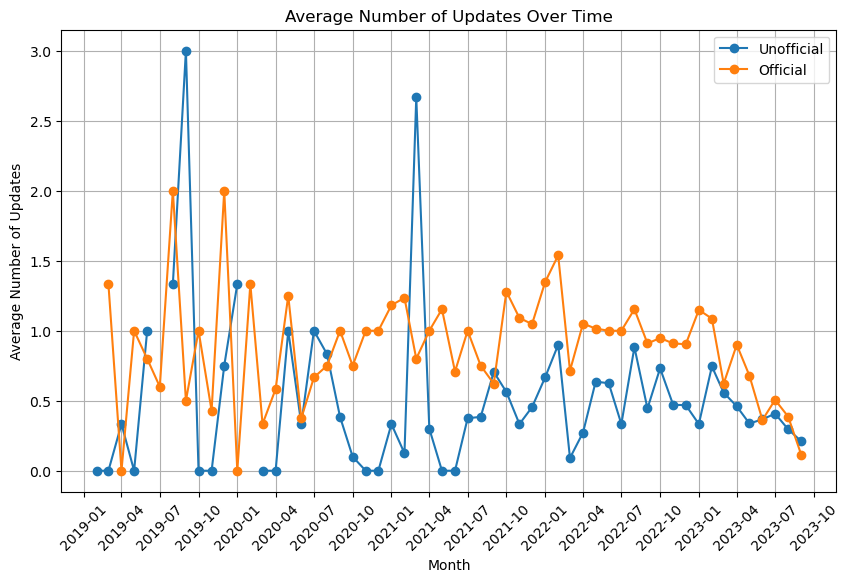

In [37]:
# Function to calculate number of updates
def calculate_number_of_updates(versions):
    # Calculate the number of updates
    num_updates = len(versions) - 1
    
    return num_updates

# Apply the function to the 'versions' column to get the number of updates for each preprint
df['NumberOfUpdates'] = df['versions'].apply(calculate_number_of_updates)

# Group by 'Month' and 'IsOfficial' and calculate the mean number of updates
df_monthly_updates = df.groupby(['Month', 'IsOfficial'])['NumberOfUpdates'].mean().unstack()

# Convert 'Month' to timestamp
df_monthly_updates.index = df_monthly_updates.index.to_timestamp()

# Plot the average number of updates over time
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_updates.index, df_monthly_updates[0], marker='o', label='Unofficial')
plt.plot(df_monthly_updates.index, df_monthly_updates[1], marker='o', label='Official')

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Average Number of Updates')
plt.title('Average Number of Updates Over Time')
plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
plt.legend()
plt.grid(True)
plt.show()

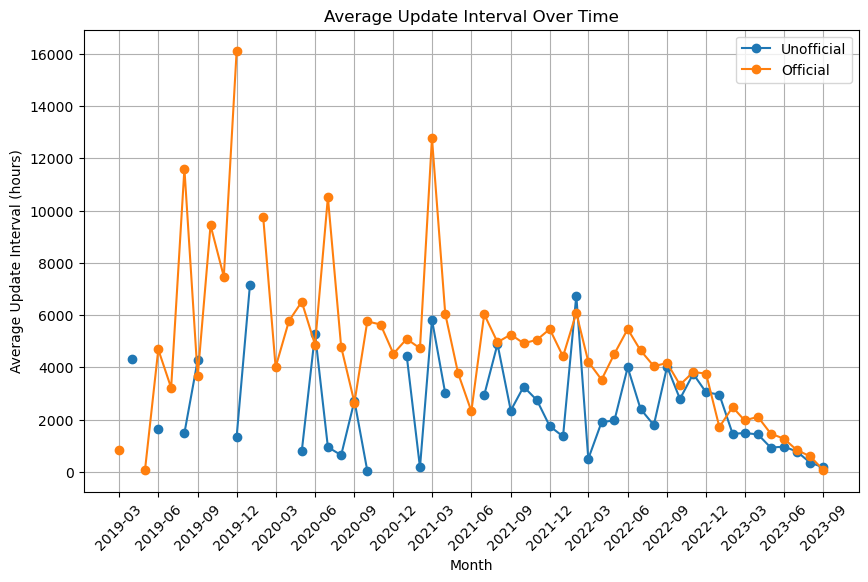

In [38]:
# Function to calculate update interval in hours
def calculate_update_interval(versions):
    # Sort versions by 'created' date
    versions_sorted = sorted(versions, key=lambda x: x['created'])
    
    # Calculate the update interval in hours
    update_interval = (versions_sorted[-1]['created'] - versions_sorted[0]['created']).total_seconds() / 3600
    
    return update_interval

# Apply the function to the 'versions' column to get the update interval for each preprint
df['UpdateInterval'] = df['versions'].apply(calculate_update_interval)

# Filter out preprints with less than 2 versions
df_multi = df[df['NumberOfUpdates'] >= 1]

# Group by 'Month' and 'IsOfficial' and calculate the mean update interval
df_monthly_intervals = df_multi.groupby(['Month', 'IsOfficial'])['UpdateInterval'].mean().unstack()

# Convert 'Month' to timestamp
df_monthly_intervals.index = df_monthly_intervals.index.to_timestamp()

# Plot the average update interval over time
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_intervals.index, df_monthly_intervals[0], marker='o', label='Unofficial')
plt.plot(df_monthly_intervals.index, df_monthly_intervals[1], marker='o', label='Official')

# Set x-axis ticks at a three-month interval
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Month')
plt.ylabel('Average Update Interval (hours)')
plt.title('Average Update Interval Over Time')
plt.xticks(rotation=45)  # rotate x-axis labels by 45 degrees
plt.legend()
plt.grid(True)
plt.show()

In [39]:
df

,id_x,submitter,authors_x,title,comments,journal-ref,doi,report-no,categories,license,...,containOpenAndClose,PureClose,PureOpen,containOpen,containClose,containModel,IsOfficial,UpdateSpeed,NumberOfUpdates,UpdateInterval
0,1902.09097,Joe Booth,"Joe Booth, Jackson Booth",Marathon Environments: Multi-Agent Continuous ...,AAAI-2019 Workshop on Games and Simulations fo...,AAAI-2019 Workshop on Games and Simulations fo...,NaN,NaN,cs.AI cs.LG cs.MA,http://arxiv.org/licenses/nonexclusive-distrib...,...,0,0,0,0,0,0,0,0.000000,0,0.000000
1,1903.01669,Vijaya Sai Krishna Gottipati,"Sai Krishna, Keehong Seo, Dhaivat Bhatt, Vince...",Deep Active Localization,10 pages,NaN,NaN,NaN,cs.RO cs.AI cs.LG stat.ML,http://creativecommons.org/publicdomain/zero/1.0/,...,0,0,0,0,0,0,1,0.000000,0,0.000000
2,1903.08855,Nelson F. Liu,Nelson F. Liu and Matt Gardner and Yonatan Bel...,Linguistic Knowledge and Transferability of Co...,"22 pages, 4 figures; to appear at NAACL 2019",NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,0,0,0,0,0,0,1,0.114286,4,851.266667
3,1903.09295,'Stephen' Zhen Gou,"Stephen Zhen Gou, Yuyang Liu",DQN with model-based exploration: efficient le...,NaN,NaN,NaN,NaN,cs.LG stat.ML,http://arxiv.org/licenses/nonexclusive-distrib...,...,0,0,0,0,0,0,0,0.000000,0,0.000000
4,1903.11437,Franck Burlot,Franck Burlot and Fran\c{c}ois Yvon,Using Monolingual Data in Neural Machine Trans...,Published in the Proceedings of the Third Conf...,NaN,NaN,NaN,cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,0,0,0,0,0,0,1,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073,2310.00212,Tianhao Wu,"Tianhao Wu, Banghua Zhu, Ruoyu Zhang, Zhaojin ...",Pairwise Proximal Policy Optimization: Harness...,"19 pages, 5 figures",NaN,NaN,NaN,cs.LG cs.AI cs.CL,http://arxiv.org/licenses/nonexclusive-distrib...,...,0,0,0,0,0,0,0,0.000000,0,0.000000
5068,2310.00117,Mohi Reza,"Mohi Reza, Nathan Laundry, Ilya Musabirov, Pet...",ABScribe: Rapid Exploration of Multiple Writin...,NaN,NaN,NaN,NaN,cs.HC cs.AI cs.LG,http://creativecommons.org/licenses/by/4.0/,...,0,0,0,0,0,0,0,0.000000,0,0.000000
5050,2309.17272,Shuai Lu,"Baizhou Huang, Shuai Lu, Weizhu Chen, Xiaojun ...",Enhancing Large Language Models in Coding Thro...,Preprint version,NaN,NaN,NaN,cs.CL cs.AI cs.SE,http://arxiv.org/licenses/nonexclusive-distrib...,...,0,1,0,0,1,1,0,0.000000,0,0.000000
5085,2310.00385,Fei Zhao,"Fei Zhao, Taotian Pang, Zhen Wu, Zheng Ma, Shu...",Dynamic Demonstrations Controller for In-Conte...,Under review,NaN,NaN,NaN,cs.CL cs.AI,http://arxiv.org/licenses/nonexclusive-distrib...,...,0,0,0,0,0,0,0,0.000000,0,0.000000


# (Number) open source vs closed source

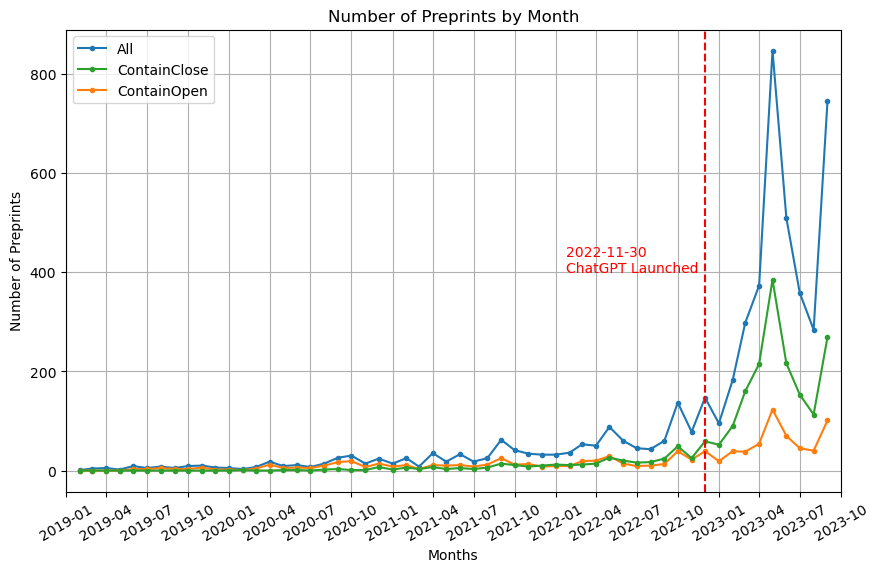

In [88]:
# Group by 'Month' and calculate the sum for each label
df_monthly_all = df.groupby('Month').size()
df_monthly_pureclose = df.groupby('Month')['PureClose'].sum()
df_monthly_pureopen = df.groupby('Month')['PureOpen'].sum()
df_monthly_containopenandclose = df.groupby('Month')['containOpenAndClose'].sum()
df_monthly_containopen = df.groupby('Month')['containOpen'].sum()
df_monthly_containclose = df.groupby('Month')['containClose'].sum()
df_monthly_containmodel = df.groupby('Month')['containModel'].sum()

# Convert 'Month' to timestamp
df_monthly_all.index = df_monthly_all.index.to_timestamp()
# df_monthly_pureclose.index = df_monthly_pureclose.index.to_timestamp()
# df_monthly_pureopen.index = df_monthly_pureopen.index.to_timestamp()
# df_monthly_containopenandclose.index = df_monthly_containopenandclose.index.to_timestamp()
df_monthly_containopen.index = df_monthly_containopen.index.to_timestamp()
df_monthly_containclose.index = df_monthly_containclose.index.to_timestamp()
df_monthly_containmodel.index = df_monthly_containmodel.index.to_timestamp()

# Calculate the total number of preprints for each label
totals = {
    'All': df_monthly_all.sum(),
    # 'PureClose': df_monthly_pureclose.sum(),
    # 'PureOpen': df_monthly_pureopen.sum(),
    # 'ContainOpenAndClose': df_monthly_containopenandclose.sum(),
    'ContainOpen': df_monthly_containopen.sum(),
    'ContainClose': df_monthly_containclose.sum(),
    # 'ContainModel': df_monthly_containmodel.sum(),
}

# Plot the number of preprints over time
fig, ax = plt.subplots(figsize=(10, 6))
lines = {}
lines['All'] = ax.plot(df_monthly_all.index, df_monthly_all.values, marker='o', markersize=3)
# lines['PureClose'] = ax.plot(df_monthly_pureclose.index, df_monthly_pureclose.values, marker='o', markersize=3)
# lines['PureOpen'] = ax.plot(df_monthly_pureopen.index, df_monthly_pureopen.values, marker='o', markersize=3)
# lines['ContainOpenAndClose'] = ax.plot(df_monthly_containopenandclose.index, df_monthly_containopenandclose.values, marker='o', markersize=3)
lines['ContainOpen'] = ax.plot(df_monthly_containopen.index, df_monthly_containopen.values, marker='o', markersize=3)
lines['ContainClose'] = ax.plot(df_monthly_containclose.index, df_monthly_containclose.values, marker='o', markersize=3)
# lines['ContainModel'] = ax.plot(df_monthly_containmodel.index, df_monthly_containmodel.values, marker='o', markersize=3)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-ticks every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format x-ticks as 'YYYY-MM'
ax.set_xlim([pd.Timestamp('2019-01'), pd.Timestamp('2023-10')])  # set x-axis limits

plt.xticks(rotation=30)
plt.xlabel('Months')
plt.ylabel('Number of Preprints')
plt.title('Number of Preprints by Month')
plt.grid(True)

# Order legend by total number of preprints
ordered_labels = sorted(totals, key=totals.get, reverse=True)
ordered_handles = [lines[label][0] for label in ordered_labels]
ax.legend(ordered_handles, ordered_labels)

ax.axvline(pd.Timestamp('2022-11-30'), color='r', linestyle='--')  # add vertical line
ax.annotate('2022-11-30\nChatGPT Launched', xy=(pd.Timestamp('2022-11-30'), 400), xycoords='data', xytext=(-100,0), textcoords='offset points', color='r')  # add annotation

plt.show()

C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\3567578679.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='Percentage of Preprints', hue='Label', data=df_seaborn, ci=95, marker='o', markersize=3)


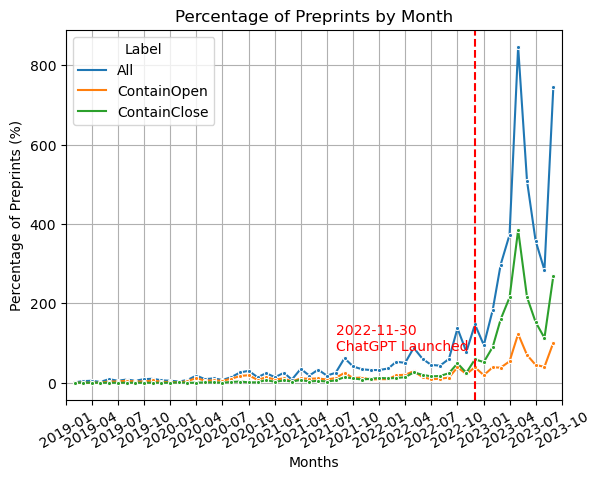

In [91]:
# Group by 'Month' and calculate the sum for each label
df_monthly_all = df.groupby('Month').size()
df_monthly_pureclose = df.groupby('Month')['PureClose'].sum()
df_monthly_pureopen = df.groupby('Month')['PureOpen'].sum()
df_monthly_containopenandclose = df.groupby('Month')['containOpenAndClose'].sum()
df_monthly_containopen = df.groupby('Month')['containOpen'].sum()
df_monthly_containclose = df.groupby('Month')['containClose'].sum()
df_monthly_containmodel = df.groupby('Month')['containModel'].sum()

# Convert 'Month' to timestamp
df_monthly_all.index = df_monthly_all.index.to_timestamp()
# df_monthly_pureclose.index = df_monthly_pureclose.index.to_timestamp()
# df_monthly_pureopen.index = df_monthly_pureopen.index.to_timestamp()
# df_monthly_containopenandclose.index = df_monthly_containopenandclose.index.to_timestamp()
df_monthly_containopen.index = df_monthly_containopen.index.to_timestamp()
df_monthly_containclose.index = df_monthly_containclose.index.to_timestamp()
df_monthly_containmodel.index = df_monthly_containmodel.index.to_timestamp()


# Create a new DataFrame for seaborn
df_seaborn = pd.DataFrame({
    'Month': df_monthly_all.index,
    'All': df_monthly_all.values,
    'ContainOpen': df_monthly_containopen.values,
    'ContainClose': df_monthly_containclose.values,
})

# Melt the DataFrame to long format for seaborn
df_seaborn = df_seaborn.melt('Month', var_name='Label', value_name='Percentage of Preprints')

# Plot the percentage of preprints over time with 95% confidence interval
sns.lineplot(x='Month', y='Percentage of Preprints', hue='Label', data=df_seaborn, ci=95, marker='o', markersize=3)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-ticks every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format x-ticks as 'YYYY-MM'
ax.set_xlim([pd.Timestamp('2019-01'), pd.Timestamp('2023-10')])  # set x-axis limits

plt.xticks(rotation=30)
plt.xlabel('Months')
plt.ylabel('Percentage of Preprints (%)')
plt.title('Percentage of Preprints by Month')
plt.grid(True)

ax.axvline(pd.Timestamp('2022-11-30'), color='r', linestyle='--')  # add vertical line
ax.annotate('2022-11-30\nChatGPT Launched', xy=(pd.Timestamp('2022-11-30'), 80), xycoords='data', xytext=(-100,0), textcoords='offset points', color='r')  # add annotation

plt.show()

C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\926021802.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='All', data=df_bootstrap, ci=95, label='All', marker='o', markersize=3)
C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\926021802.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='ContainClose', data=df_bootstrap, ci=95, label='Close', marker='o', markersize=3)
C:\Users\jiawei\AppData\Local\Temp\ipykernel_16320\926021802.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='Month', y='ContainOpen', data=df_bootstrap, ci=95, label='Open', marker='o', markersize=3)


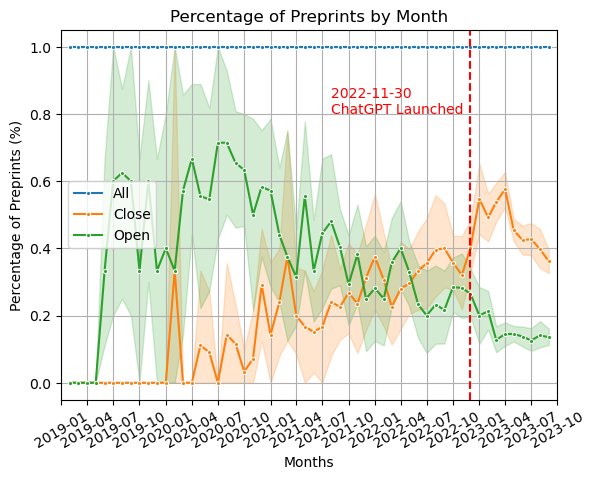

In [95]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd

# Initialize an empty list to store the data
data = []

# For each row in the DataFrame
for index, row in df.iterrows():
    # Create a dictionary to store the data for this row
    row_data = {'Month': row['Month']}
    # Determine whether the row is in each category
    row_data['All'] = 1
    row_data['ContainModel'] = row['containModel']
    row_data['ContainClose'] = row['containClose']
    row_data['ContainOpen'] = row['containOpen']
    # Add the data for this row to the list
    data.append(row_data)

# Convert the list to a DataFrame
df_bootstrap = pd.DataFrame(data)

# Convert 'Month' to datetime
df_bootstrap['Month'] = df_bootstrap['Month'].dt.to_timestamp()

# Now you can use seaborn's lineplot function to plot the data with a 95% confidence interval
sns.lineplot(x='Month', y='All', data=df_bootstrap, ci=95, label='All', marker='o', markersize=3)
# sns.lineplot(x='Month', y='ContainModel', data=df_bootstrap, ci=95, label='Model', marker='o', markersize=3)
sns.lineplot(x='Month', y='ContainClose', data=df_bootstrap, ci=95, label='Close', marker='o', markersize=3)
sns.lineplot(x='Month', y='ContainOpen', data=df_bootstrap, ci=95, label='Open', marker='o', markersize=3)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-ticks every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format x-ticks as 'YYYY-MM'
ax.set_xlim([pd.Timestamp('2019-01'), pd.Timestamp('2023-10')])  # set x-axis limits

plt.xticks(rotation=30)
plt.xlabel('Months')
plt.ylabel('Percentage of Preprints (%)')
plt.title('Percentage of Preprints by Month')
plt.grid(True)

ax.axvline(pd.Timestamp('2022-11-30'), color='r', linestyle='--')  # add vertical line
ax.annotate('2022-11-30\nChatGPT Launched', xy=(pd.Timestamp('2022-11-30'), 0.8), xycoords='data', xytext=(-100,0), textcoords='offset points', color='r')  # add annotation

plt.show()

# institution (Top University)